In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.odr import polynomial
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from tensorflow.python.keras.saving.saved_model_experimental import sequential

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

pd.set_option('display.max_rows', None)

print("Path to dataset files:", path)

/Users/gatiengenevois/Desktop/IA01_projet/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/gatiengenevois/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [3]:
# load dataset
df = pd.read_csv(path + "/heart.csv")
print("Dataset shape:", df.shape)
print("Dataset 5 first rows:")
print(df.head())
print("Dataset description:")
print(df.describe())
print("Dataset values count:")
print(df.count())

Dataset shape: (918, 12)
Dataset 5 first rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Dataset description:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   

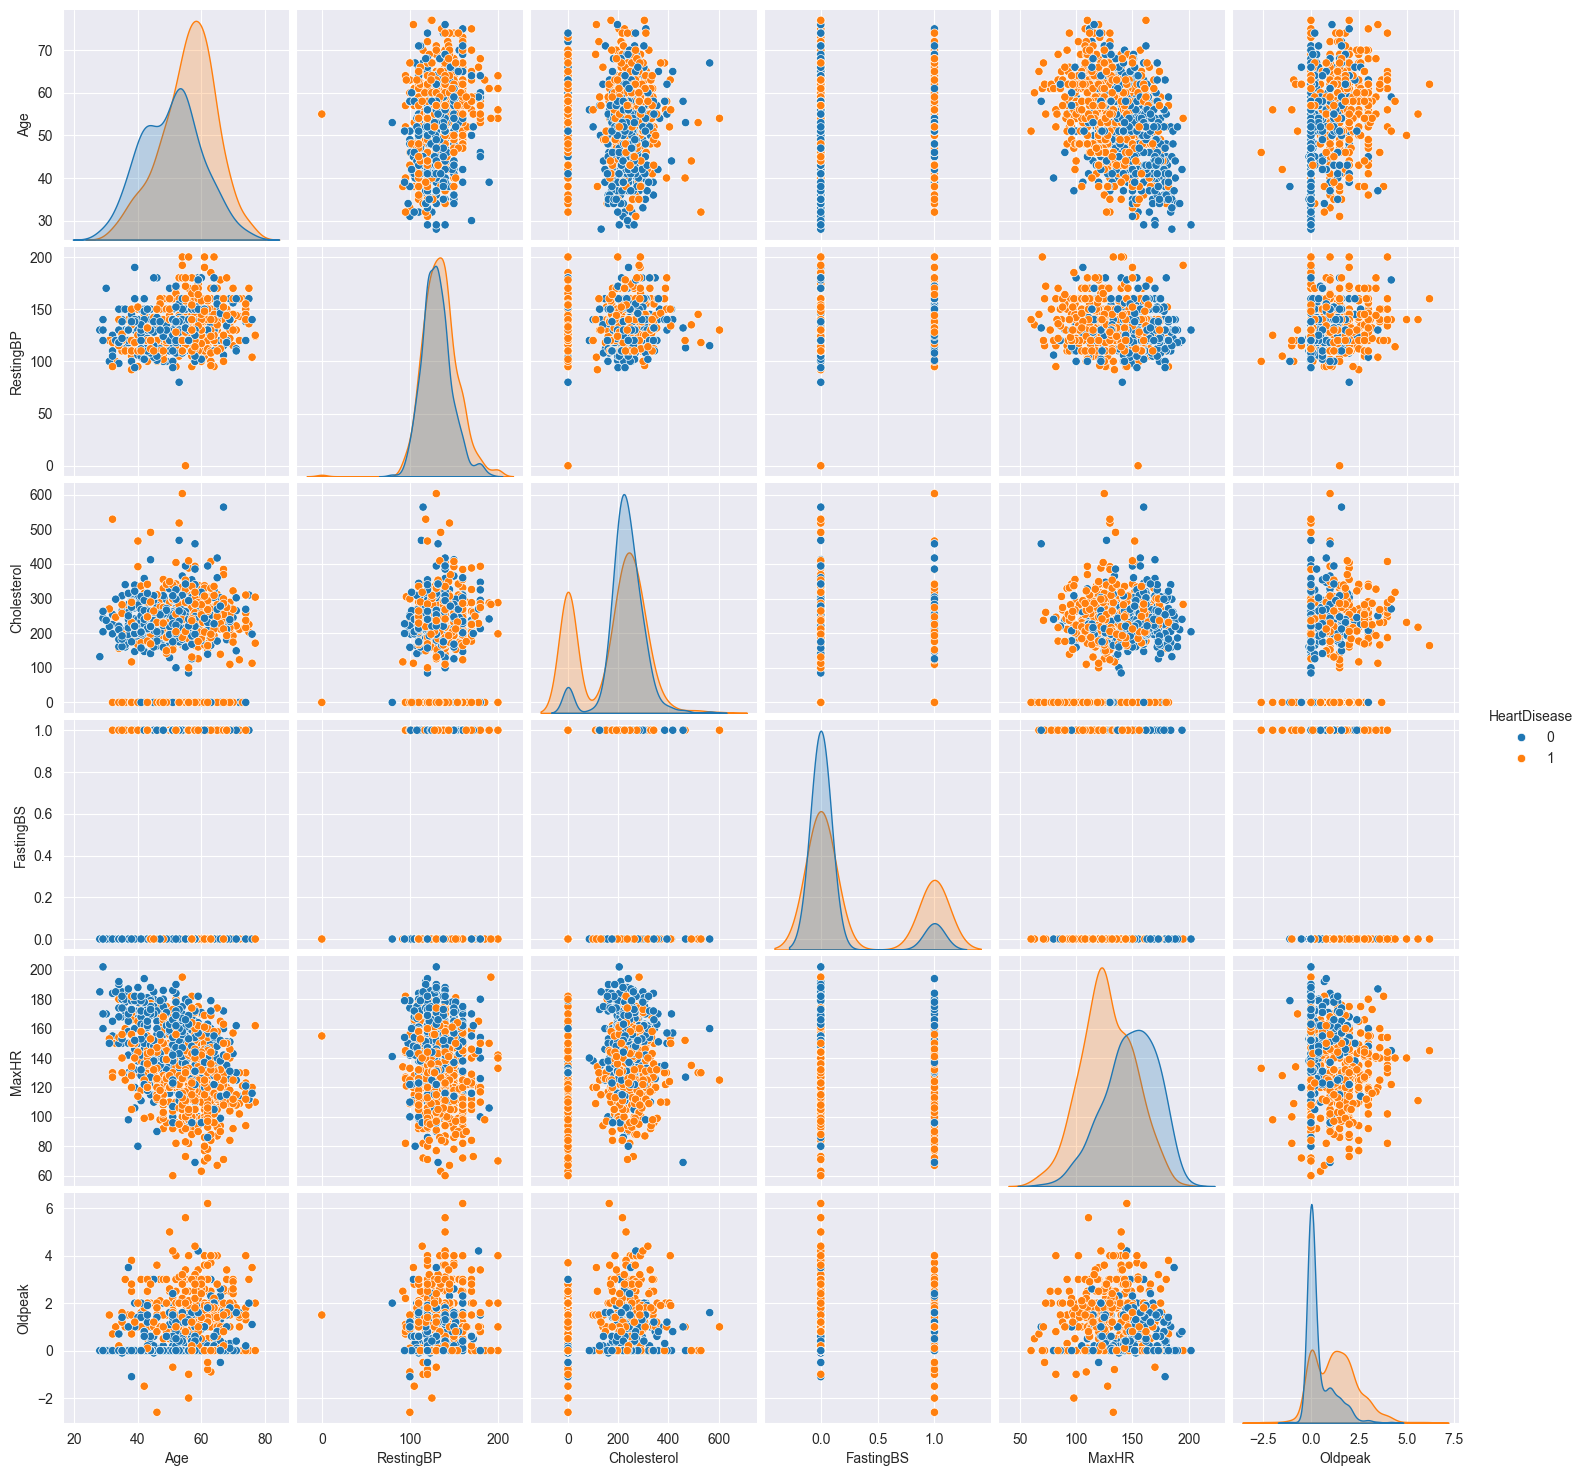

In [4]:
"""
Comprendre les caractéristiques du jeu de
données, leur distribution et leur relation entre elles ainsi qu'avec la variable cible.
L'objectif est de détecter les corrélations pertinentes entre les variables explicatives et
d'identifier les facteurs qui influencent le plus la sortie. Une analyse bien détaillée et
pertinente est attendue de vous.
"""

sns.pairplot(data=df, hue="HeartDisease")
plt.show()

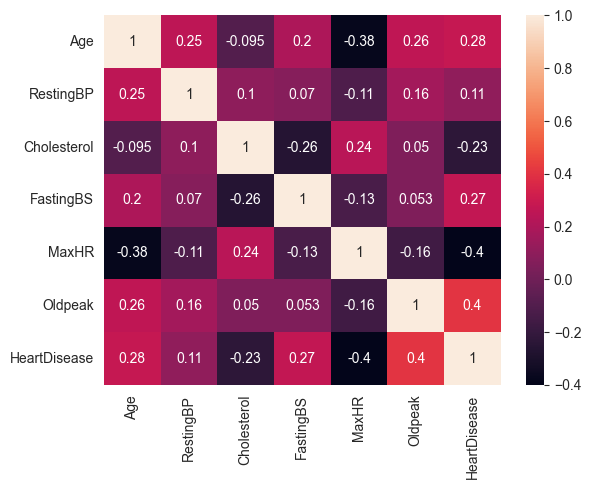

In [5]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

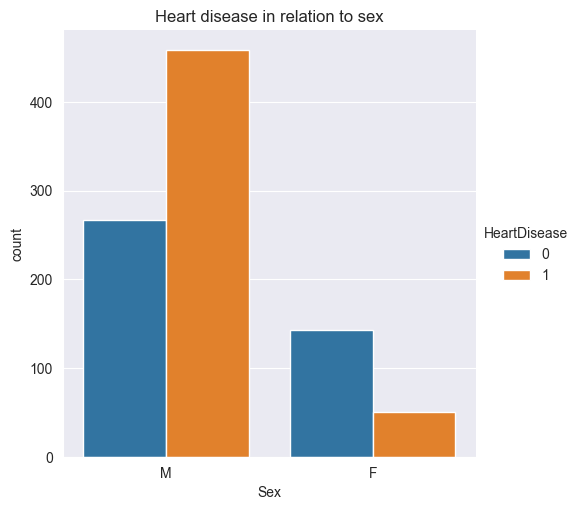

Proportion of men with heart disease: 0.6317241379310344 %
Proportion of women with heart disease: 0.25906735751295334 %


In [6]:
sns.catplot(data=df, x="Sex", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to sex")
plt.show()
man_with_heart_disease = df[(df['Sex'] == "M") & (df['HeartDisease'] == 1)]
man_without_heart_disease = df[(df['Sex'] == "M") & (df['HeartDisease'] == 0)]
woman_with_heart_disease = df[(df['Sex'] == "F") & (df['HeartDisease'] == 1)]
woman_without_heart_disease = df[(df['Sex'] == "F") & (df['HeartDisease'] == 0)]
print(f"Proportion of men with heart disease: {len(man_with_heart_disease) / (len(man_without_heart_disease) + len(man_with_heart_disease))} %")
print(f"Proportion of women with heart disease: {len(woman_with_heart_disease) / (len(woman_without_heart_disease) + len(woman_with_heart_disease))} %")

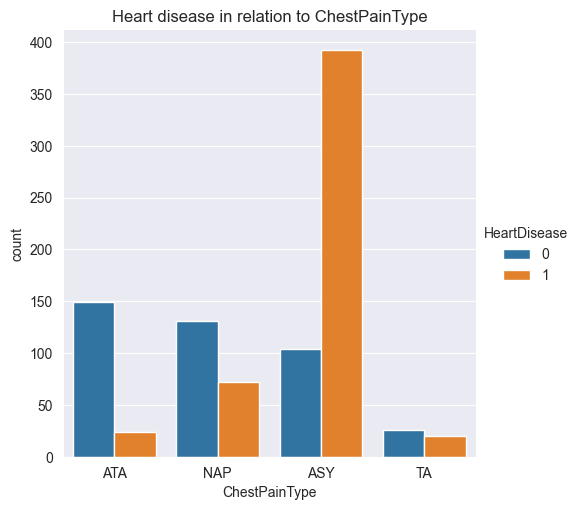

In [7]:
sns.catplot(data=df, x="ChestPainType", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to ChestPainType")
plt.show()

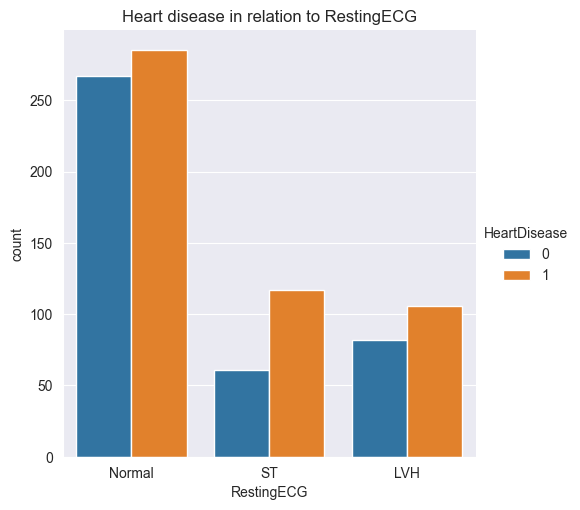

In [8]:
sns.catplot(df, x="RestingECG", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to RestingECG")
plt.show()

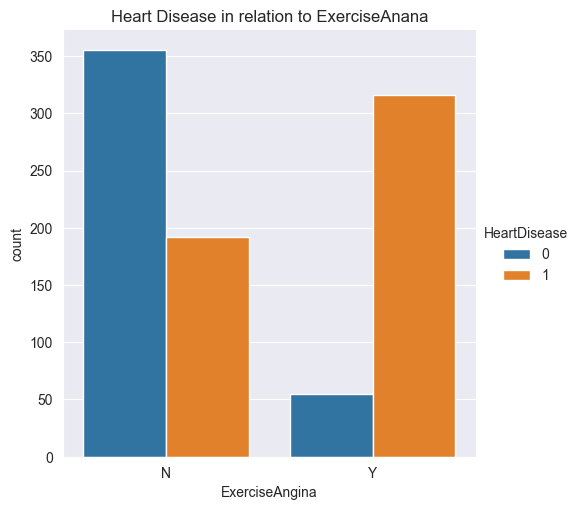

In [9]:
sns.catplot(df, x="ExerciseAngina", hue="HeartDisease", kind="count")
plt.title("Heart Disease in relation to ExerciseAnana")
plt.show()

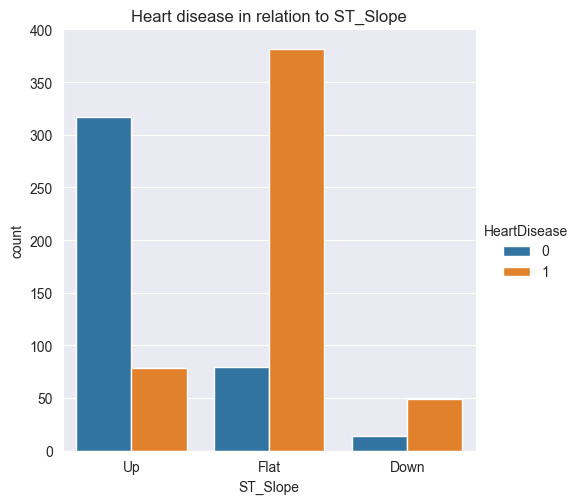

In [10]:
sns.catplot(df, x="ST_Slope", hue="HeartDisease", kind="count")
plt.title("Heart disease in relation to ST_Slope")
plt.show()

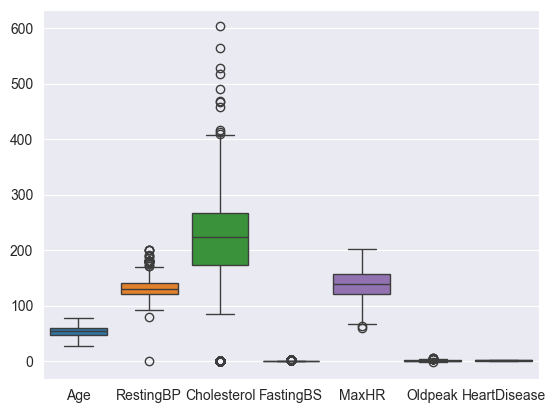

In [11]:
sns.boxplot(data=df)
plt.show()

In [12]:
"""
Préparation des données : Effectuer les transformations nécessaires pour rendre les
données utilisables dans les modèles (par exemple, gestion des valeurs manquantes,
transformation des variables catégorielles, gestion des valeurs aberrantes).
"""

# manage missing values
print(f"Nb lines before dropna {df.shape[0]}")
df = df.dropna()
print(f"Nb lines after dropna {df.shape[0]}") # all lines have complete data

Nb lines before dropna 918
Nb lines after dropna 918


Outliers for RestingBP (28):
109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
314     80
365    200
372    185
399    200
411    180
423    180
449      0
475    178
550    172
585    180
592    190
673    174
702    178
725    180
732    200
759    192
774    178
780    180
855    180
880    172
Name: RestingBP, dtype: int64


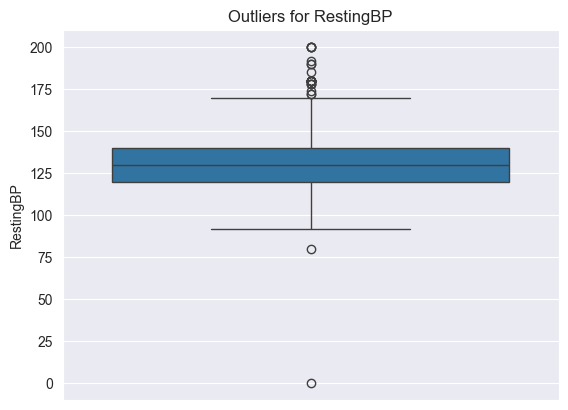

Outliers for Cholesterol (183):
28     468
30     518
69     412
76     529
103    466
149    603
250    491
293      0
294      0
295      0
296      0
297      0
298      0
299      0
300      0
301      0
302      0
303      0
304      0
305      0
306      0
307      0
308      0
309      0
310      0
311      0
312      0
313      0
314      0
315      0
316      0
317      0
318      0
319      0
320      0
321      0
322      0
323      0
324      0
325      0
326      0
327      0
328      0
329      0
330      0
331      0
332      0
333      0
334      0
335      0
336      0
337      0
338      0
339      0
340      0
341      0
342      0
343      0
344      0
345      0
346      0
347      0
348      0
349      0
350      0
351      0
352      0
353      0
354      0
355      0
356      0
357      0
358      0
359      0
360      0
361      0
362      0
363      0
364      0
365      0
366      0
367      0
368      0
369      0
370      0
371      0
372      0
373      0


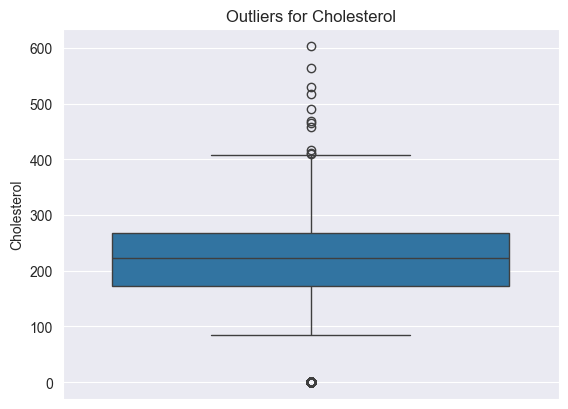

Outliers for FastingBS (214):
36     1
38     1
52     1
84     1
86     1
97     1
103    1
105    1
112    1
117    1
120    1
128    1
149    1
155    1
160    1
165    1
185    1
187    1
210    1
224    1
242    1
247    1
294    1
295    1
296    1
297    1
298    1
299    1
300    1
302    1
303    1
304    1
305    1
306    1
308    1
309    1
311    1
312    1
313    1
315    1
316    1
317    1
318    1
319    1
320    1
321    1
322    1
323    1
324    1
325    1
327    1
328    1
329    1
330    1
331    1
333    1
334    1
335    1
337    1
338    1
339    1
340    1
341    1
342    1
343    1
344    1
347    1
349    1
350    1
377    1
378    1
389    1
393    1
394    1
395    1
396    1
397    1
398    1
399    1
400    1
401    1
402    1
403    1
404    1
405    1
406    1
407    1
408    1
409    1
410    1
411    1
412    1
413    1
414    1
415    1
420    1
422    1
424    1
425    1
430    1
437    1
441    1
442    1
443    1
448    1
454    1
457    1
458    

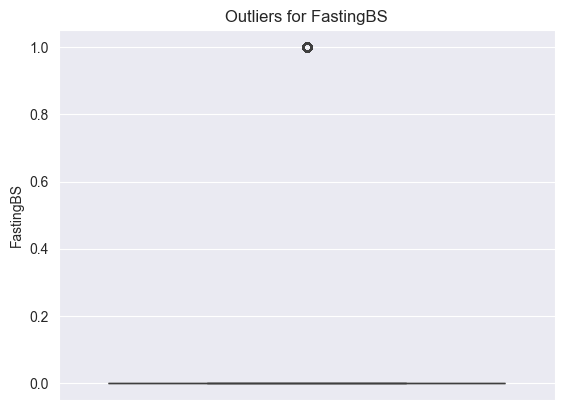

Outliers for MaxHR (2):
370    63
390    60
Name: MaxHR, dtype: int64


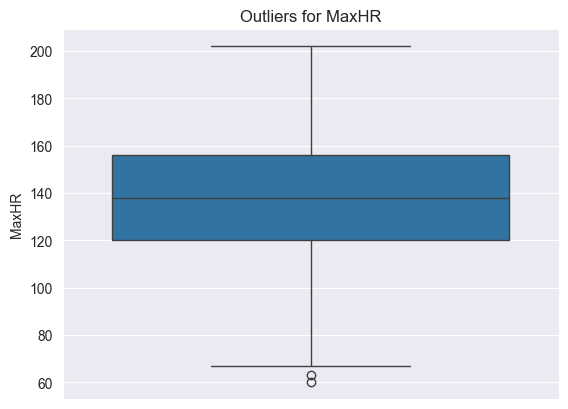

Outliers for Oldpeak (16):
68     4.0
166    5.0
324   -2.6
500    4.0
521    4.0
537    4.0
559    4.0
624    4.0
702    4.2
732    4.0
771    5.6
775    3.8
791    4.2
850    6.2
900    4.4
908    4.0
Name: Oldpeak, dtype: float64


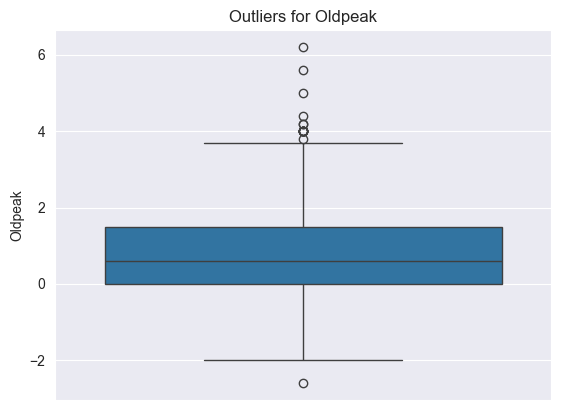

In [13]:
# manage outliers
def find_outliers(column_name : str)-> pd.DataFrame:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    pd = df[(df[column_name]>(Q3 + 1.5*IQR)) | (df[column_name]<(Q1 - 1.5*IQR))]
    return pd if not pd.empty else None

for col in df:
    col_type = df[col].dtypes
    if col_type == np.int64 or col_type == np.float64:
        outliers = find_outliers(col)
        if outliers is not None:
            print(f"Outliers for {col} ({len(outliers)}):")
            print(outliers[col])
            sns.boxplot(data=df[col])
            plt.title(f"Outliers for {col}")
            plt.show()


In [14]:
# Our goal is now to replace aberrant outliers with another value

def replace_aberrant_values(column_name : str, min_threshold:int, max_threshold:int)-> pd.DataFrame:
    print(f"Mean before replacement: {df[column_name].mean()}")
    values_to_replace_mask = (df[column_name]<min_threshold) | (df[column_name]>max_threshold)
    replacement_value = df[column_name].median()
    df.loc[values_to_replace_mask, column_name] = replacement_value
    print(f"Mean after replacement: {df[column_name].mean()}")

In [15]:
"""
Age
RestingBP
Cholesterol
Oldpeak
"""

replace_aberrant_values("Age", 0, 122)
replace_aberrant_values("RestingBP", 90, 120)
replace_aberrant_values("Cholesterol", 0, 560)
replace_aberrant_values("Oldpeak", 0, 6)


Mean before replacement: 53.510893246187365
Mean after replacement: 53.510893246187365
Mean before replacement: 132.39651416122004
Mean after replacement: 124.87472766884531
Mean before replacement: 198.7995642701525
Mean after replacement: 198.01416122004358
Mean before replacement: 0.8873638344226579
Mean after replacement: 0.9037037037037036


In [16]:
# fix categorical values with problem

categorical_features = [
    "Sex",
    "ChestPainType",
    "FastingBS",
    "RestingECG",
    "ExerciseAngina",
    "ST_Slope",
    "HeartDisease"
]

for col in categorical_features:
    print(df[col].unique())

# remove false category
a = ['M', 'F']
df = df[df['Sex'].isin(a)]

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
[0 1]
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']
[0 1]


In [17]:
# transform categorical values
from sklearn.preprocessing import OneHotEncoder

# replace sex by 0 or 1
df.Sex.replace(to_replace=['M', 'F'], value=[0, 1], inplace=True)

# replace ChestPainType with one hot encoding
if 'ChestPainType' in df.columns:
    chest_pain_type_one_hot = pd.get_dummies(df['ChestPainType'], prefix='ChestPainType').astype(int)
    df.drop(['ChestPainType'], axis=1, inplace=True)
    df[chest_pain_type_one_hot.columns] = chest_pain_type_one_hot

# replace RestingECG by one hot encoding
if 'RestingECG' in df.columns:
    resting_ecg_one_hot = pd.get_dummies(df['RestingECG'], prefix='RestingECG').astype(int)
    df.drop(['RestingECG'], axis=1, inplace=True)
    df[resting_ecg_one_hot.columns] = resting_ecg_one_hot

# replace ExerciseAngina by 0 or 1
df.ExerciseAngina.replace(to_replace=['N', 'Y'], value=[0, 1], inplace=True)

# replace ST_Slope by one hot encoding
if 'ST_Slope' in df.columns:
    st_slope_one_hot = pd.get_dummies(df['ST_Slope'], prefix='ST_Slope').astype(int)
    df.drop(['ST_Slope'], axis=1, inplace=True)
    df[st_slope_one_hot.columns] = st_slope_one_hot

/var/folders/0x/dznzjnpd7r3_cd7ybxbm6yjc0000gn/T/ipykernel_2234/2315672060.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Sex.replace(to_replace=['M', 'F'], value=[0, 1], inplace=True)
/var/folders/0x/dznzjnpd7r3_cd7ybxbm6yjc0000gn/T/ipykernel_2234/2315672060.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

In [18]:
# Create X & y

X = df[['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']]

y = df['HeartDisease']

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
"""
Modélisation : Utiliser des algorithmes de classification pour prédire si les sujets étudiés
ont une insuffisance cardiaque. Les algorithmes à considérer sont ceux du cours,
notamment : kNN, arbre de décision, forêts aléatoires, régression logistique et réseaux de
neurones. Il faudra également choisir un algorithme de classification non vu en cours,
l’expliquer brièvement et le tester.
"""

'\nModélisation : Utiliser des algorithmes de classification pour prédire si les sujets étudiés\nont une insuffisance cardiaque. Les algorithmes à considérer sont ceux du cours,\nnotamment : kNN, arbre de décision, forêts aléatoires, régression logistique et réseaux de\nneurones. Il faudra également choisir un algorithme de classification non vu en cours,\nl’expliquer brièvement et le tester.\n'

In [19]:
# LogisticRegression

model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X_train_scaled, y_train)
y_pred_train = model_logistic_regression.predict(X_train_scaled)
y_pred_test = model_logistic_regression.predict(X_test_scaled)

print(f"Accuracy score for train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy score for test: {accuracy_score(y_test, y_pred_test)}")

Accuracy score for train: 0.8719346049046321
Accuracy score for test: 0.842391304347826


In [20]:
# test with regularization
model_logistic_regression_l2 = LogisticRegression(penalty='l2')
model_logistic_regression_l2.fit(X_train_scaled, y_train)
y_pred_train = model_logistic_regression_l2.predict(X_train_scaled)
y_pred_test = model_logistic_regression_l2.predict(X_test_scaled)

print(f"Accuracy score for train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy score for test: {accuracy_score(y_test, y_pred_test)}")

Accuracy score for train: 0.8719346049046321
Accuracy score for test: 0.842391304347826


In [21]:
# kNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
y_pred_train = knn_classifier.predict(X_train_scaled)
y_pred_test = knn_classifier.predict(X_test_scaled)
print(f"Accuracy score for train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy score for test: {accuracy_score(y_test, y_pred_test)}")

Accuracy score for train: 0.8841961852861036
Accuracy score for test: 0.8858695652173914


In [22]:
# Random forest
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
y_pred_train = random_forest_classifier.predict(X_train)
y_pred_test = random_forest_classifier.predict(X_test)
print(f"Accuracy score for train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy score for test: {accuracy_score(y_test, y_pred_test)}")

Accuracy score for train: 1.0
Accuracy score for test: 0.8804347826086957


Accuracy score for train: 1.0
Accuracy score for test: 0.7934782608695652


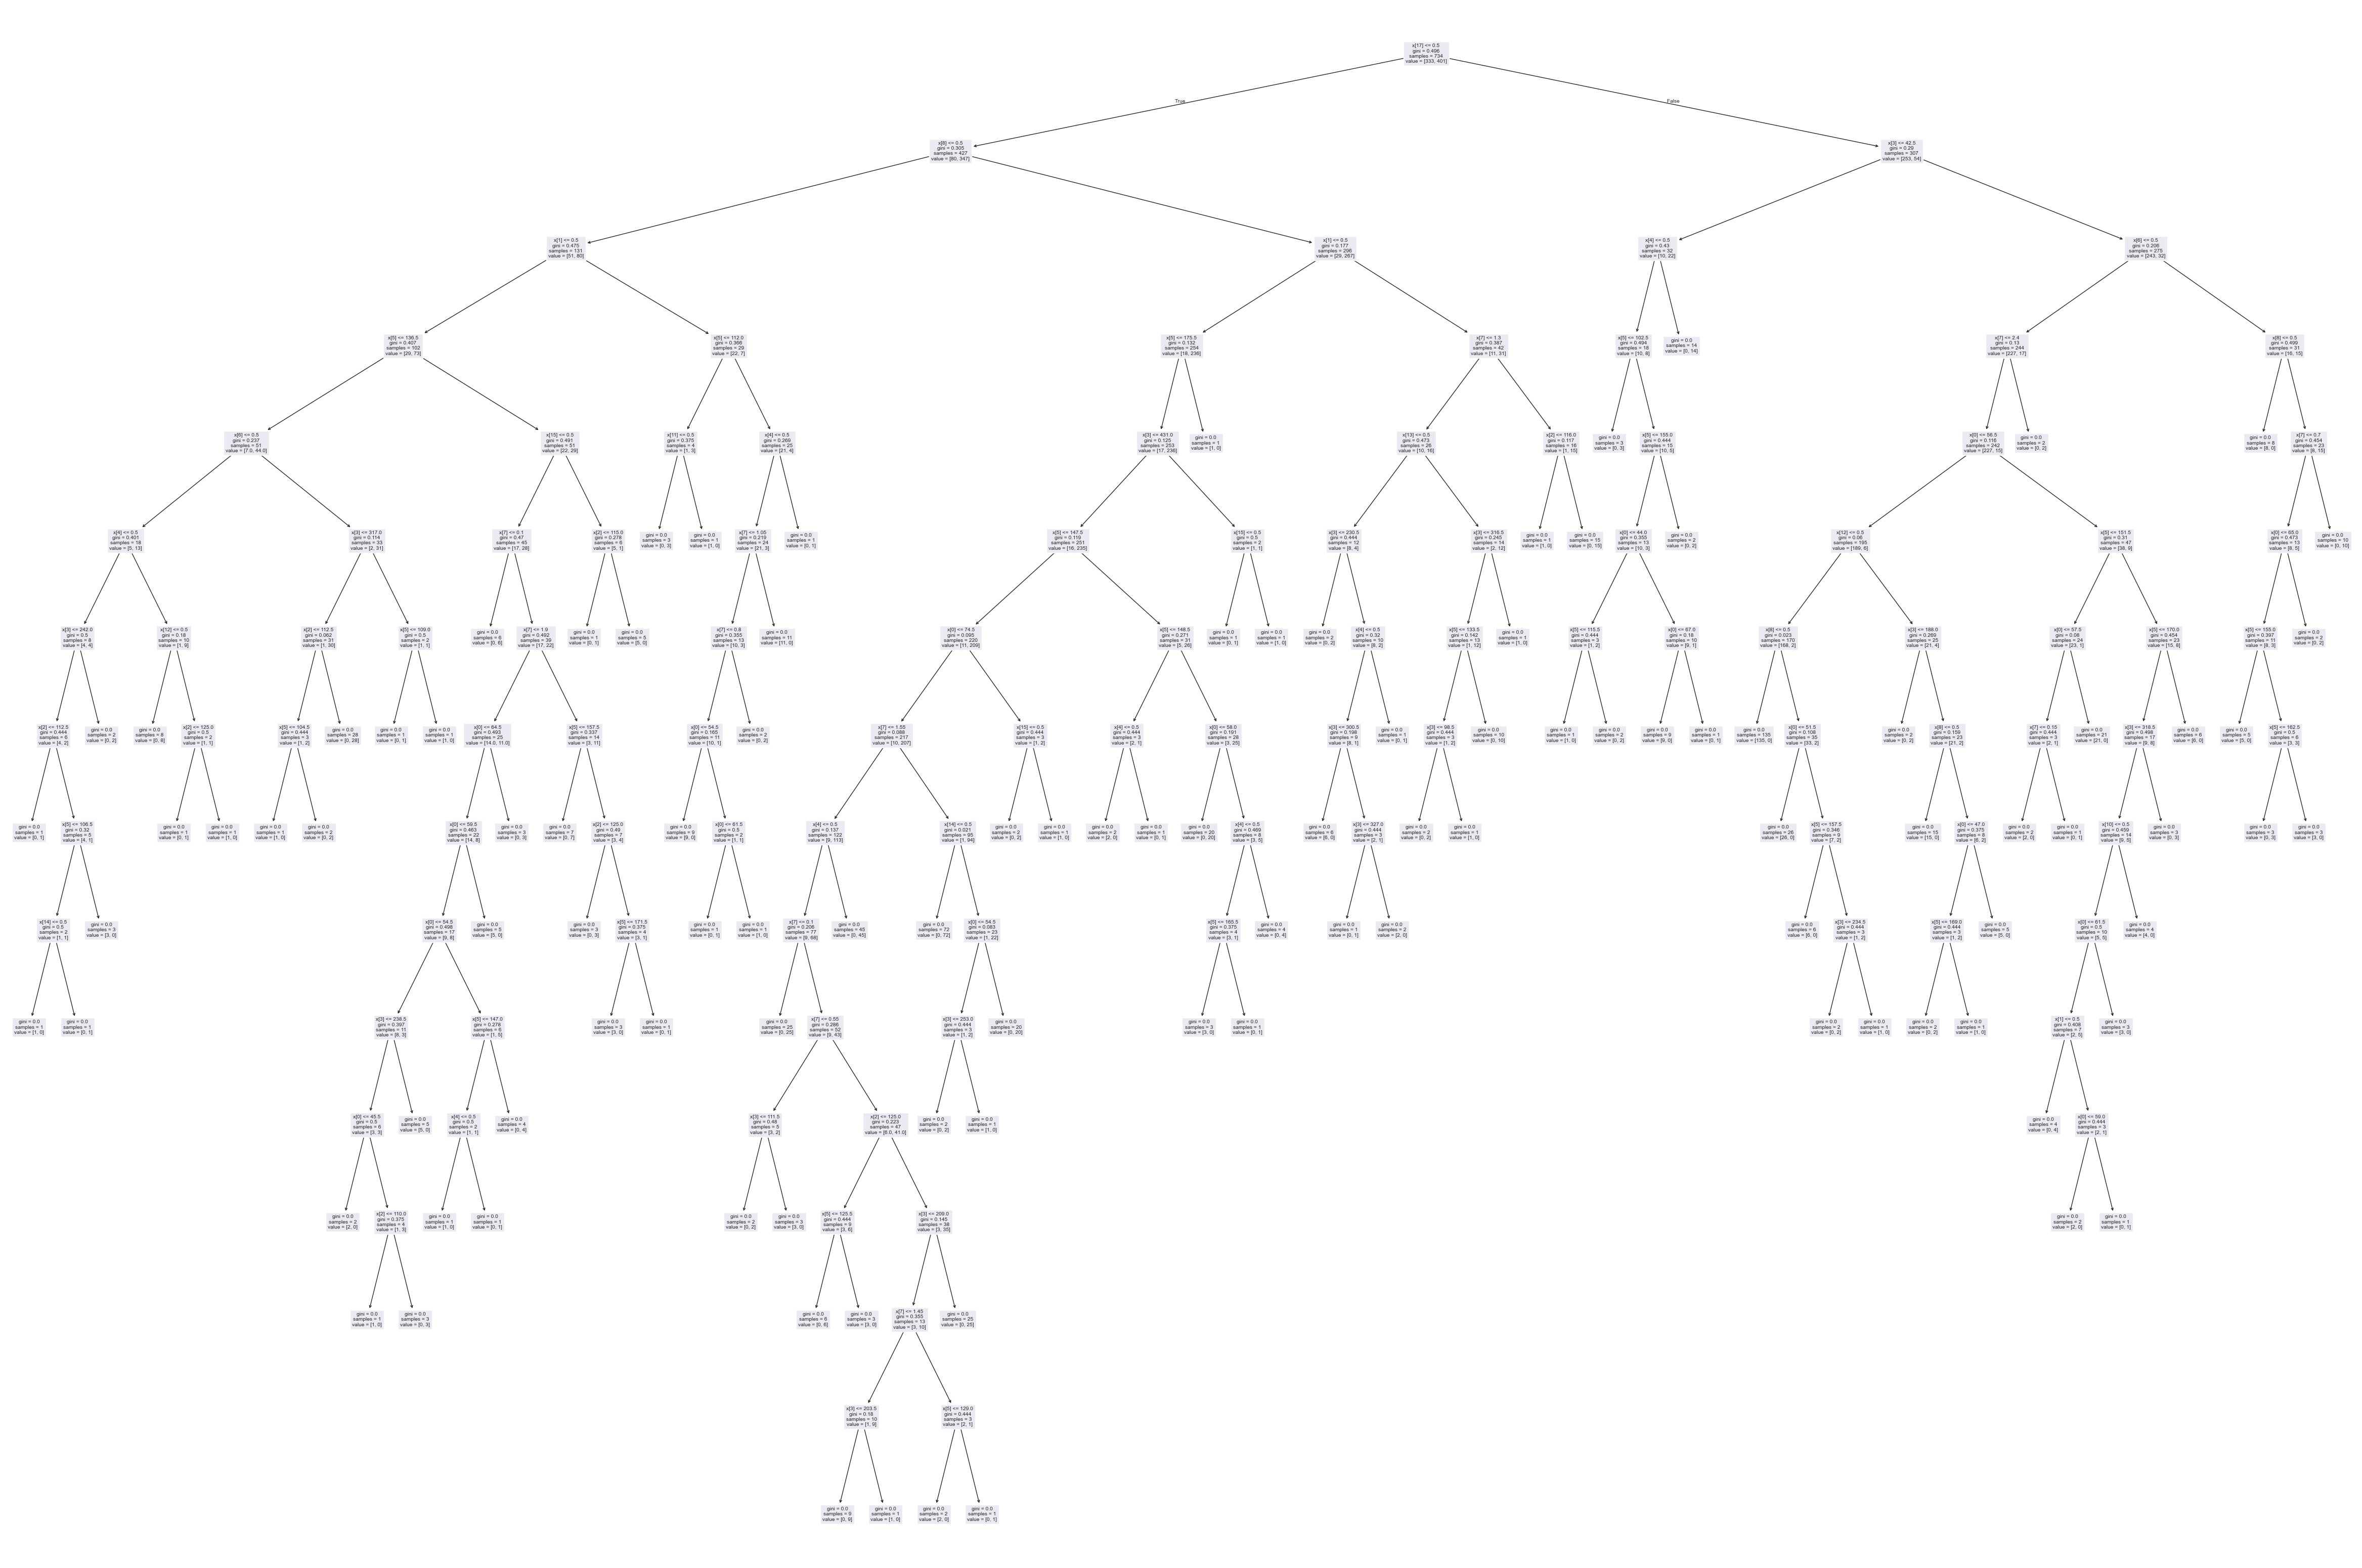

In [23]:
# Decision tree
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)
y_pred_train = decision_tree_classifier.predict(X_train)
y_pred_test = decision_tree_classifier.predict(X_test)
print(f"Accuracy score for train: {accuracy_score(y_train, y_pred_train)}")
print(f"Accuracy score for test: {accuracy_score(y_test, y_pred_test)}")
plt.figure(figsize=(60, 40))
plot_tree(decision_tree=decision_tree_classifier)
plt.show()

In [29]:
# neura network
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import accuracy_score

n_cols = X_train_scaled.shape[1]

nn_model = Sequential([
Input(shape=(n_cols,)), # Définir la forme d'entrée
Dense(units=100, activation='relu'),
Dense(units=1, activation='sigmoid') # Dernière couche
])

# Compiling the model
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)
nn_model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=16)
y_test_proba = nn_model.predict(X_test_scaled)
y_test_pred = (y_test_proba >= 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Test model accuracy:', accuracy_test)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.8529 - loss: 0.3777 
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.8665 - loss: 0.3092
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8638 - loss: 0.2978
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.8815 - loss: 0.2869
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8910 - loss: 0.2739
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.8828 - loss: 0.2696
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.8978 - loss: 0.2556
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8869 - loss: 0.2595
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.8896 - loss: 0.2558
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.8924 - loss: 0.2414
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.9074 - loss: 0.2371
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/ste

In [36]:
# neura network
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import accuracy_score

n_cols = X_train_scaled.shape[1]

for x in range(10):
    model2 = Sequential()
    model2.add(Input(shape=(n_cols,)))
    for i in range(10):
        model2.add(Dense(units=100, activation='relu'))
    model2.add(Dense(units=1, activation='sigmoid'))
    # Compiling the model
    from keras.optimizers import Adam
    optimizer = Adam(learning_rate=0.01)
    model2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    model2.fit(X_train_scaled, y_train, epochs=50, batch_size=16)
    y_test_proba = model2.predict(X_test_scaled)
    y_test_pred = (y_test_proba >= 0.5).astype(int)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f"Test model accuracy for {x} hidden layers:", accuracy_test)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.7398 - loss: 0.5318
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.8597 - loss: 0.3940
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.8542 - loss: 0.3696
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.8692 - loss: 0.3891
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8787 - loss: 0.3264
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.8815 - loss: 0.2987
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8747 - loss: 0.3196
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.8706 - loss: 0.3660
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.8719 - loss: 0.4284
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.8379 - loss: 0.6048
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.8597 - loss: 0.4004
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step

In [37]:
model_5_hidden_layer = Sequential()
model_5_hidden_layer.add(Input(shape=(n_cols,)))
for i in range(10):
    model_5_hidden_layer.add(Dense(units=100, activation='relu'))
model_5_hidden_layer.add(Dense(units=1, activation='sigmoid'))
# Compiling the model
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.01)
model_5_hidden_layer.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
model_5_hidden_layer.fit(X_train_scaled, y_train, epochs=50, batch_size=16)
y_test_proba = model_5_hidden_layer.predict(X_test_scaled)
y_test_pred = (y_test_proba >= 0.5).astype(int)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test model accuracy for 5 hidden layers:", accuracy_test)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.8134 - loss: 0.5911
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8542 - loss: 0.3916
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8815 - loss: 0.3393
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.8801 - loss: 0.3086
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.8774 - loss: 0.3057
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.8747 - loss: 0.3462
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.8515 - loss: 0.3863
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.8365 - loss: 0.4126
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8692 - loss: 0.3999
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.8597 - loss: 0.3337
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8733 - loss: 0.3194
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step -

In [40]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train_scaled, y_train)
y_test_proba = svm_model.predict(X_test_scaled)
y_test_pred = (y_test_proba >= 0.5).astype(int)
print(accuracy_score(y_test, y_test_pred))

0.8804347826086957


In [25]:
"""
Évaluation : Mesurer la performance des modèles en utilisant des métriques adaptées.
"""

'\nÉvaluation : Mesurer la performance des modèles en utilisant des métriques adaptées.\n'